# Intro to Histograms: Visualization and Analysis

Do you remember when you first learned about histograms? I honestly don't even though I analyze histograms everyday. Was it in a stats class? Maybe physics? I think it was in college but I'm not sure. That's because I probably never really *learned* anything about histograms. Ironically, I ended up looking at histrograms more than any other type of data visualization over the course of my career. 

## What are histograms?

If you are new to data analysis, histograms are plots that are used to visualize the **distribution** of a particular variable or feature. So what do I mean by distribution? Usually, "distribution" refers to the relative frequency of occurence, *i.e.* the "count" of the number of times a given variable **appears** in the data set.

Even if you've never taken a probability / stats class you've probably seen a lot histograms. The most common is the "bell curve" distribution. You might have seen one of these plots describing the distribution of grades in one of your classes or the distribution of some human physical feature such as height or weight. 

In mathematical terms the bell curve is known as the "Normal" distribution or the "Gaussian" distribution. Both names are used interchangeably. The Normal distribution has a mean value (top center of the bell) and standard deviation (approximate width of the bell). 

Let's generate a well-defined histogram using the Normal distribution. We can do this using NumPy and the ```numpy.random.normal()``` method. We'll define a mean of 5 and a standard deviation of 1. The mean value is passed as the *loc* argument ```loc=5``` and the standard deviation is passed as the *scale* argument ```scale=1```. We'll use a sample size of 1000, ```size=1000``` which should be enough points to make the distribution smooth but not too many to slow things down.


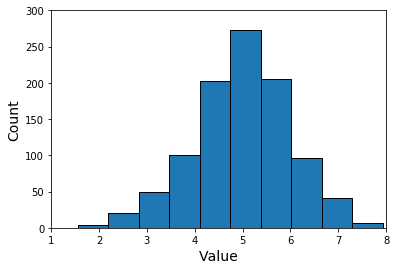

In [1]:
%matplotlib inline

import pylab as plt
import numpy as np
import numpy.random as npr

npr.seed(5555)
data_set = npr.normal(loc=5, scale=1, size=1000)
plt.hist(data_set, edgecolor="k")
plt.xlabel("Value", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.axis([1, 8, 0, 300])
plt.show()

Ahhh now that probably looks familiar, right? The mean value of 5 is clearly defined and there is some finite width where the vast majority of values appear between 4 and 6 which is 5 +/- 1 where 1 is our standard deviation. As you get further and further from the mean value, the counts decrease smoothly until approaching zero around the values of 2 and 8. These values are said to be "three standard deviations from the mean" since our standard deviation is 1. You might have heard similar descriptions in the context of "outliers." Though hopefully you didn't see it in that awful Gladwell book. 

So it's clear that the mean and standard deviation contribute to the shape of the distribution. We can see exactly how by taking a look at the probability density function that defines the Normal distribution:

## $f(x\vert\mu,\sigma) = \frac{1}{\sqrt{2\pi\sigma^2}}e^{-\frac{(x-\mu)^2}{2\sigma^2}}$

Where $\mu$ denotes the mean and $\sigma$ denotes the standard deviation. If we plot this function with the mean and standard deviation we set for the histogram above, we see a nice bell-shape.

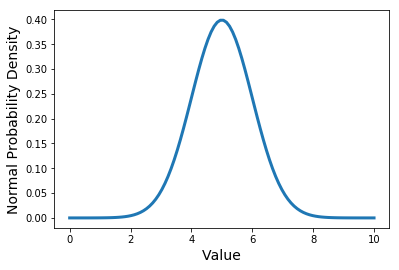

In [2]:
def normal_pdf(x, mu, sigma):
    return 1/np.sqrt(2*np.pi*sigma**2)*np.exp(-((x-mu)**2)/(2*sigma**2))

x = np.linspace(0,10,100)

plt.plot(x, normal_pdf(x, 5, 1), linewidth=3)
plt.xlabel("Value", fontsize=14)
plt.ylabel("Normal Probability Density", fontsize=14)
plt.show()

Probability density functions provide relative likelihoods of sampling variables so they are useful in comparing different samples that may exhibit different absolute distributions but similar distribution shapes. In simpler terms, these functions can provide a range of likely values that a particular random variable can be. 

Now take a look at the range of y-values generated by the Normal probability function. It looks like this function approximates the shape of our distribution but has an integrated area of 1 (100% probability). To test this, we can integrate the function using SciPy.

In [3]:
import scipy.integrate as spi

integral, error = spi.quad(normal_pdf, 0, 10, args=(5,1))

print("Integrated Area = "+str(integral))

Integrated Area = 0.9999994266968565


Now that's pretty darn close to 1!

Probability density functions are useful in fitting distributions that may be observed for real data. Though we have only mentioned the Normal distribution so far, there are many different different shapes and these distributions all have their own probability density function.

## Isn't this a bar graph?

Now if you are new to data analysis and have never seen a histogram before you might think it resembles a bar graph. However, it's important to know the difference. In a bar graph, you plot two variables whereas a histogram contains information about a single variable only. Moreover, in a bar graph, each observation will be represented as its own bar whereas in a histogram, different values are grouped together based on their similiarity. This is why we don't see 1000 different bars in our histogram. To make this more clear, let's make an actual bar graph to describe ```data_set```. We must specify a second variable so we'll generate some x-coordinates which will just be the index of each element in ```data_set```. The y-coordinates will be the value of each element.

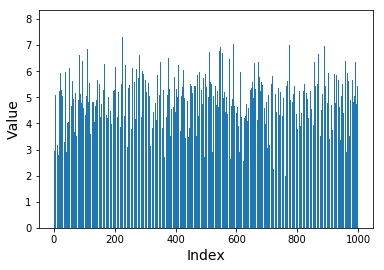

In [4]:
# Make x-coordinate values 1, 2, 3, ... , 1000
x_coordinates = np.linspace(0, len(data_set), len(data_set))

plt.bar(x_coordinates, data_set)
plt.xlabel("Index", fontsize=14)
plt.ylabel("Value", fontsize=14)
plt.show()

Recall we arbitrarily defined our x-coordinates to be the element index. Since bar graphs are dependent on two variables, changing our definition of x-coordinates will change the shape of the plot. For example, if we sort our data (change the indices) by ascending order, the shape of the plot will change dramatically.

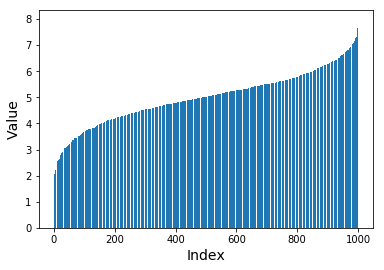

In [5]:
# Sort the data
data_set.sort()

plt.bar(x_coordinates, data_set)
plt.xlabel("Index", fontsize=14)
plt.ylabel("Value", fontsize=14)
plt.show()

But as you can clearly see, the bar plot shows every individual value. Getting a sense of the distribution of values is not so clear and it's a lot harder to identify the mean and standard deviation just by looking at the bar plots above.

One thing that makes histograms so clear is that they show the data as a finite set of groups. So instead of looking at 1000 different bars, we just look at a few. It is much easier to process the information about the distribution this way. For example, let's say I made a histogram plot of ```data_set``` but instead forced the histogram to have 1000 bars.

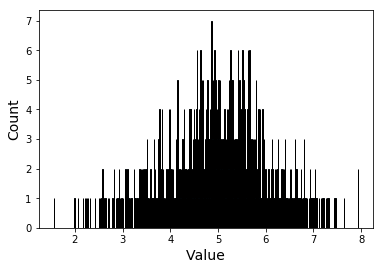

In [6]:
plt.hist(data_set, bins=1000, edgecolor='k')
plt.xlabel("Value", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.show()

Here, the bars are so narrow and close together that they appear black even though they are blue because the ```edgecolor``` (outline) is set to black. This doesn't look nearly as pretty as our original histogram but the bell-curve shape is still apparent. However, pay attention to the Count values on the y-axis. They are way lower thant in our original histogram. This means that any population-wide information we might have gleaned from grouping the data in larger sets is lost. It's hard to turn information about 4-7 counts out of 1000 into something useful!

If you noticed above, the number of bars in the histogram was determined by the *bins* argument (The same parameter is called *breaks* in R). Now, this is something that can be specified by the user meaning there is no set number of bins to use in a given application. However, as you can see above, the number of bins is critical to making the visualization effective and useful. So how do we determine the number of bins to use? 

## An optimal number of bins?

It turns out that a lot of people have thought about how to optimize the number of bins for a histogram but there really is no consensus. This sounds like such a trivial thing but it actually is not that straight forward to generalize across sample sizes and distribution shapes. So let's take an exhaustive approach and introduce what has been done (at least the more well-documented and populat approaches) and just see what the differences are.

There are reports of "grouping" data that go back to at least the 1600s. Usually, the earliest work on histogram binning is attributed to Sturges in the 1920s. Sturges introduced the following formula (now known as **"Sturges' Formula"**):

### $k = log_2(n) + 1$

Where *k* is the number of bins and *n* is the number of data points in the data set. This formula was derived from the binomial distribution and is useful for describing Normal distributions with *n* > 30. 

If you have taken the Exploratory Data Analysis course offered by Johns Hopkins University you might recall this formula from the histogram lecture.

A common choice see in "point-and-click" analysis software such as Excel just use the square root of the sample size

### $k =  ceil\; \sqrt{n}$

where $ceil$ denotes the ceiling function of rounding up to the nearest integer.

Some other methods include

**Rice Rule**: 

### $k =  ceil\;  2n^{1/3} $

**Scott's Normal Referece**:

### $k =  ceil\; \frac{3.5 \sigma}{n^{1/3}}$

where $\sigma$ is the sample standard deviation

**Freedman-Diaconis' Rule**:

### $k =  ceil\; \frac{2 IQR}{n^{1/3}}$

where $IQR$ is the interquartile range. This is analogous to Scott's Normal Reference with $2IQR$ replacing $3.5\sigma$. The justification being that the $IQR$ is less sensitive than $\sigma$ to outliers.

Of course there are **many** other methods but these are some common and relatively simply methods. So let's see what they look like.

In [7]:
import scipy.stats as sps

n = len(data_set) #1000

# bins
sturges = np.ceil(np.log2(n))
square = np.ceil(np.sqrt(n))
rice = np.ceil(2*n**(1.0/3.0))
scott = np.ceil((3.5*np.std(data_set))/(n**(1.0/3.0)))
freedman = np.ceil((2*sps.iqr(data_set))/(n**(1.0/3.0)))

print("sturges = "+str(sturges))
print("square = "+str(square))
print("rice = "+str(rice))
print("scott = "+str(scott))
print("freedman = "+str(freedman))


sturges = 10.0
square = 32.0
rice = 20.0
scott = 1.0
freedman = 1.0


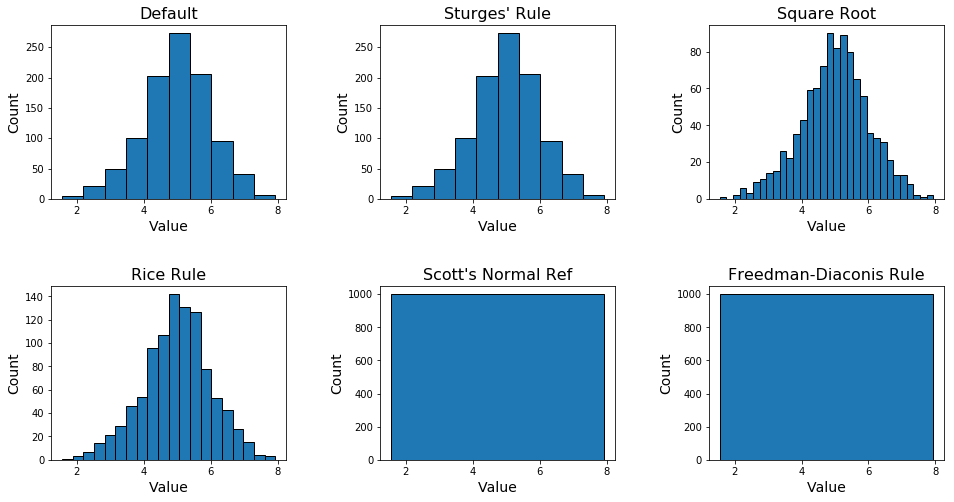

In [8]:
def plot_histogram(ax, data, binnum, title):
    if binnum:
        binnum = int(binnum)
    ax.hist(data, bins=binnum, edgecolor="k")
    ax.set_xlabel('Value', fontsize=14)
    ax.set_ylabel('Count', fontsize=14)
    ax.set_title(title, fontsize=16)

fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(16,8), constrained_layout=False)

bins = [None, sturges, square, rice, scott, freedman]
titles = ["Default", "Sturges' Rule", "Square Root", "Rice Rule", "Scott's Normal Ref", "Freedman-Diaconis Rule"] 

for x, ax in enumerate(axs.flatten()):
    plot_histogram(ax, data_set, bins[x], titles[x])
    
plt.subplots_adjust(wspace=0.4, hspace=0.5)
plt.show()


So we see Sturges' Rule yields the same number of bins as the default setting in matplotlib. The square root method yields the most number of bins and the Rice rule yields an intermediate number of bins between Sturge's rule and the square root method. Note that Scott's Normal Reference and the Freedman-Diaconis Rule yield 1 bin because the standard deviation of the data set is 1. So we can see immediately that these two rules are not useful for narrowly distributed data. Let's fix this by changing our standard deviation value to something larger, say 50.

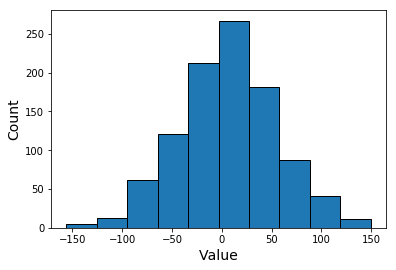

In [9]:
npr.seed(1111)
data_set2 = npr.normal(loc=5, scale=50, size=1000)
plt.hist(data_set2, edgecolor="k")
plt.xlabel("Value", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.show()

scott = 18.0
freedman = 14.0


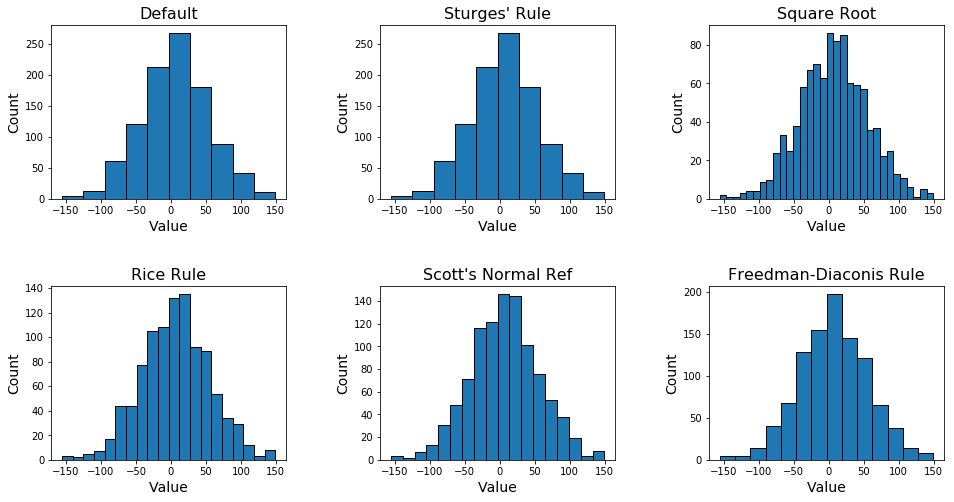

In [10]:
# Recalculate Scott and Freedman bins
scott = np.ceil((3.5*np.std(data_set2))/(n**(1.0/3.0)))
freedman = np.ceil((2*sps.iqr(data_set2))/(n**(1.0/3.0)))

bins = [None, sturges, square, rice, scott, freedman]

print("scott = "+str(scott))
print("freedman = "+str(freedman))

fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(16,8), constrained_layout=False) 

for x, ax in enumerate(axs.flatten()):
    plot_histogram(ax, data_set2, bins[x], titles[x])
    
plt.subplots_adjust(wspace=0.4, hspace=0.5)
plt.show()

Ahhh now that looks much better. It is interesting that the number of bins does change quite a lot depending on the method used. However, all of the distributions look discernably Normal. This is because we have a simple, single synthetic distribution with a well-defined mean and standard deviation. What happens when we deal with real world data?

## Histograms of Real Data

So let's look at some real data. Let's look at the average heights of men born in 1980 for a bunch of different countries. This data set is freely available [here](https://ourworldindata.org/human-height). The data come in a ```.csv``` file. It's easy to read ```.csv``` files using ```pandas```.

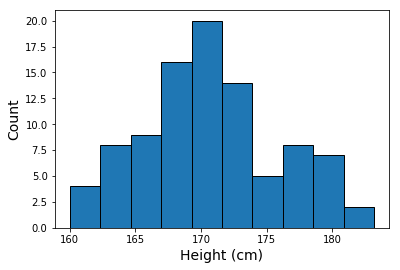

In [11]:
import pandas as pd

# Read in heights data from .csv file
height_path = "/Users/matthewstetz/Desktop/average-height-of-men-for-selected-countries.csv"
height_df = pd.read_csv(height_path)

# Subset data frame to contain only data from 1980
height_1980 = height_df[height_df["Year"]==1980]

# Convert pandas series to list
heights_plot = pd.Series.tolist(height_1980.iloc[:,3])
plt.hist(heights_plot, edgecolor="k")
plt.xlabel("Height (cm)", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.show()

This histogram was generated using the default binning. So let's compare the different bin methods to see how the shape of the distribution changes as a function of bin number.

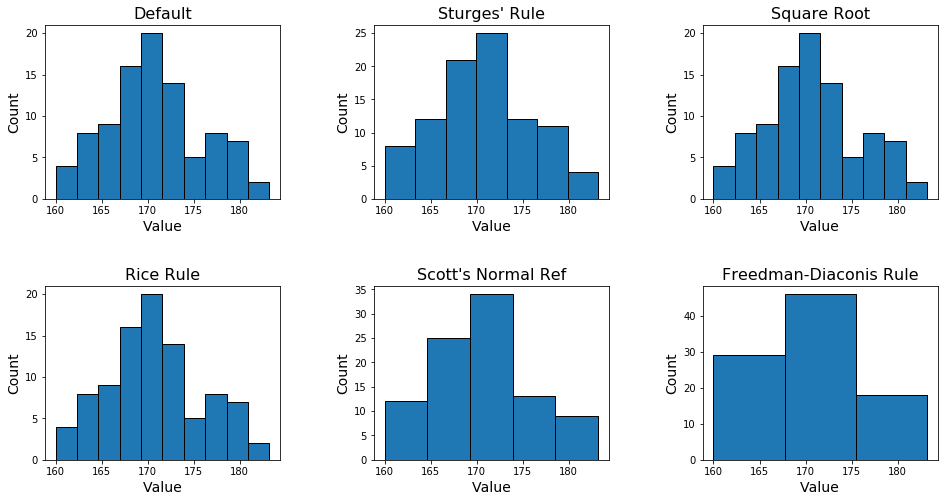

In [12]:
# Recalculate bins for new data set
n = len(heights_plot)
sturges = np.ceil(np.log2(n))
square = np.ceil(np.sqrt(n))
rice = np.ceil(2*n**(1.0/3.0))
scott = np.ceil((3.5*np.std(heights_plot))/(n**(1.0/3.0)))
freedman = np.ceil((2*sps.iqr(heights_plot))/(n**(1.0/3.0)))

bins = [None, sturges, square, rice, scott, freedman]

fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(16,8), constrained_layout=False)  

for x, ax in enumerate(axs.flatten()):
    plot_histogram(ax, heights_plot, bins[x], titles[x])
    
plt.subplots_adjust(wspace=0.4, hspace=0.5)
plt.show()

So now we see some clear differences in the shape of the distribution that arises from the bin number. Some of the distirbutions look unimodal (one peak) wheras others look bimodal (two peaks).

**Potentially unimodal**: Sturges', Scott's Normal Reference, Freedman-Diaconis Rule

**Potentially bimodal**: Deafault, Square-Root, Rice Rule